## COVID-19

**This Dataset consist of the activites people performed during lockdown**

**For making ourself on track lets note done some of the basic steps that we are going to follow 
while performing the EDA(Exploratory data analysis)**

         ---->Load the dataset
         
         ---->Understand the data,its type and missing value in the data set
         
         ---->Clean the dataset and handle the missing value from the data set
         
         ---->perform the data visualization
         
              > perform the data normalization where ever seems to require
              
              >perform the feature engineering to make data more understandable and extract the possible new information
         
         ---->create the final summary from the informationwe gather while performing EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
plt.rcParams['figure.figsize'] = 11, 5
plt.rcParams['figure.dpi'] = 100

In [2]:
df =pd.read_csv("COVID-19 Survey Student Responses1.csv")

In [21]:
df.shape

(1182, 19)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      1182 non-null   object 
 1   residence                               1182 non-null   object 
 2   age                                     1182 non-null   int64  
 3   Online Class time                       1182 non-null   float64
 4   Rating of Online Class                  1158 non-null   object 
 5   Medium for online class                 1131 non-null   object 
 6   self study time                         1182 non-null   float64
 7   fitness time                            1182 non-null   float64
 8   sleep time                              1182 non-null   float64
 9   social media time                       1182 non-null   float64
 10  social media platform                   1182 non-null   obje

In [23]:
df.columns

Index(['ID', 'residence', 'age', 'Online Class time', 'Rating of Online Class',
       'Medium for online class', 'self study time', 'fitness time',
       'sleep time', 'social media time', 'social media platform', 'TV time',
       'meals per day', 'weight changed', 'health issue', 'Stress busters',
       'Time utilized', 'connected with family,friends,relative',
       'mostly missed'],
      dtype='object')

In [24]:
df.head()

,ID,residence,age,Online Class time,Rating of Online Class,Medium for online class,self study time,fitness time,sleep time,social media time,social media platform,TV time,meals per day,weight changed,health issue,Stress busters,Time utilized,"connected with family,friends,relative",mostly missed
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [25]:
df.describe()

,age,Online Class time,self study time,fitness time,sleep time,social media time,meals per day
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000


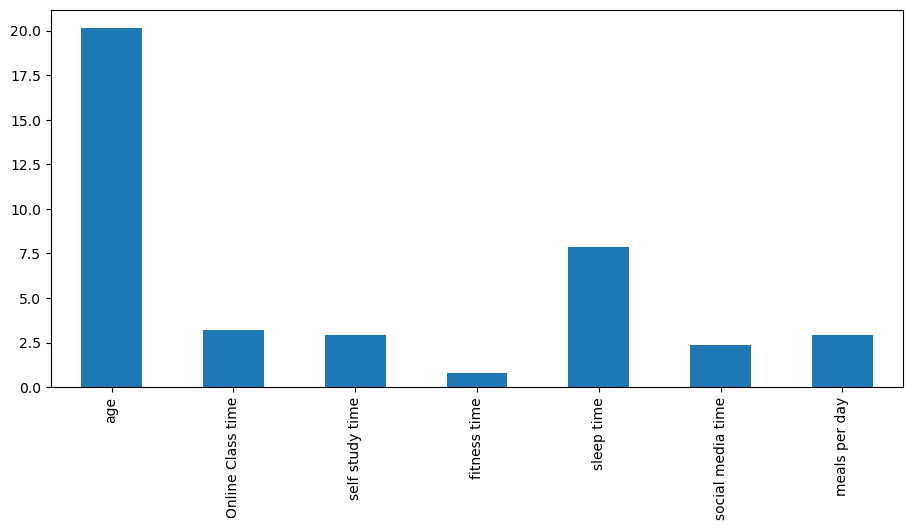

In [26]:
df.describe().loc["mean",:].plot(kind="bar")

In [27]:
df.isna().sum()

ID                                         0
residence                                  0
age                                        0
Online Class time                          0
Rating of Online Class                    24
Medium for online class                   51
self study time                            0
fitness time                               0
sleep time                                 0
social media time                          0
social media platform                      0
TV time                                    0
meals per day                              0
weight changed                             0
health issue                               0
Stress busters                             0
Time utilized                              0
connected with family,friends,relative     0
mostly missed                              0
dtype: int64

***

**From above we have check if there are any null values which needs to be handled**
***

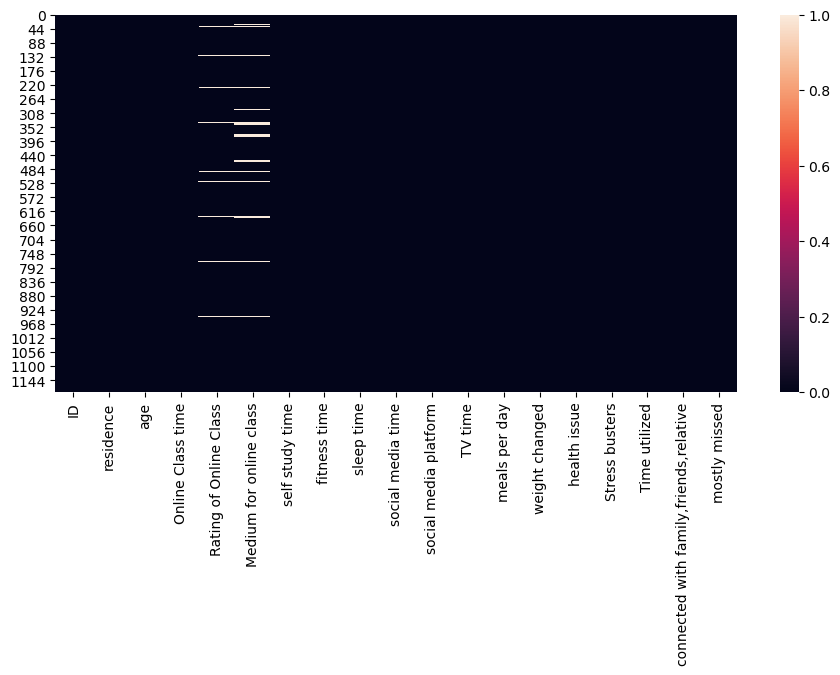

In [28]:
sns.heatmap(df.isna())

#### Preprocessing the data for the analysis

In [29]:
df["TV time"] = df["TV time"].replace("n", np.nan).replace("N", np.nan).replace("No tv", np.nan).replace(" ", np.nan).astype("float")

**Which region they belong to**

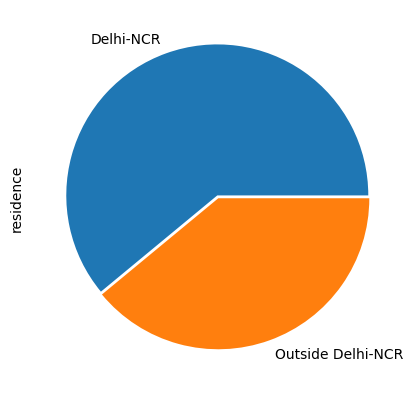

In [30]:
df["residence"].value_counts().plot(kind="pie",explode = [0.02, 0])

#### Checking the medium for online classes 

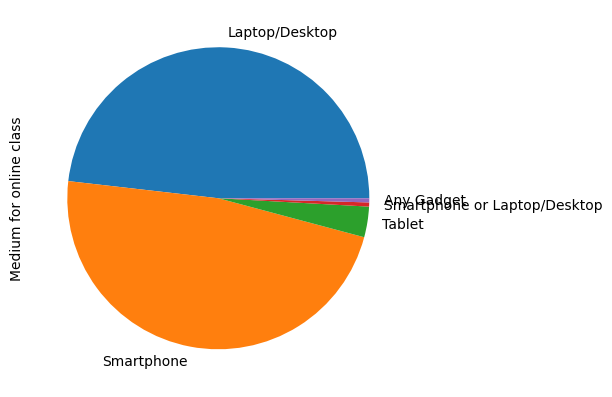

In [31]:
df["Medium for online class"].value_counts().plot(kind="pie")

***
**From this we get to know was mostly students prefer laptop or desktop to take online classes followed by smartphones**
***

**How they spent their time**

In [48]:
data=df[['Online Class time','self study time','fitness time','sleep time', 'social media time','TV time']]

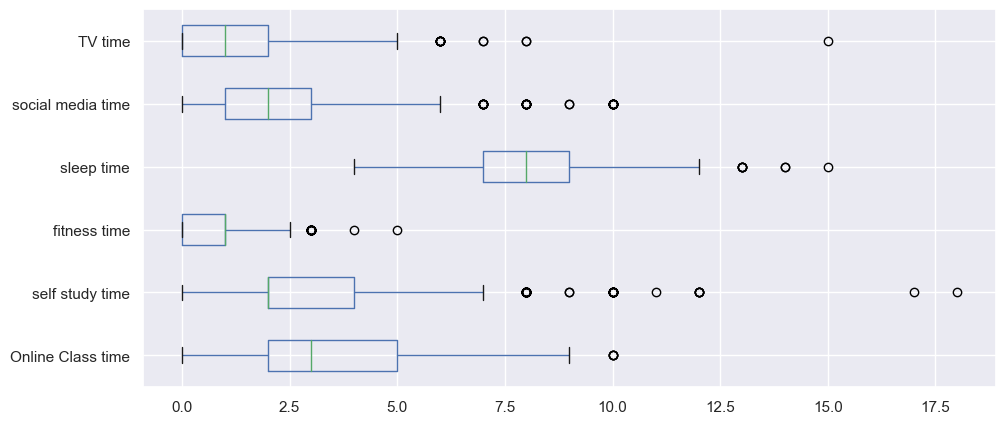

In [55]:
data.plot(kind="box",vert= False)

#### Ratings for online class

In [32]:
df["Rating of Online Class"].value_counts()

Very poor    413
Average      387
Good         230
Excellent     98
Poor          30
Name: Rating of Online Class, dtype: int64

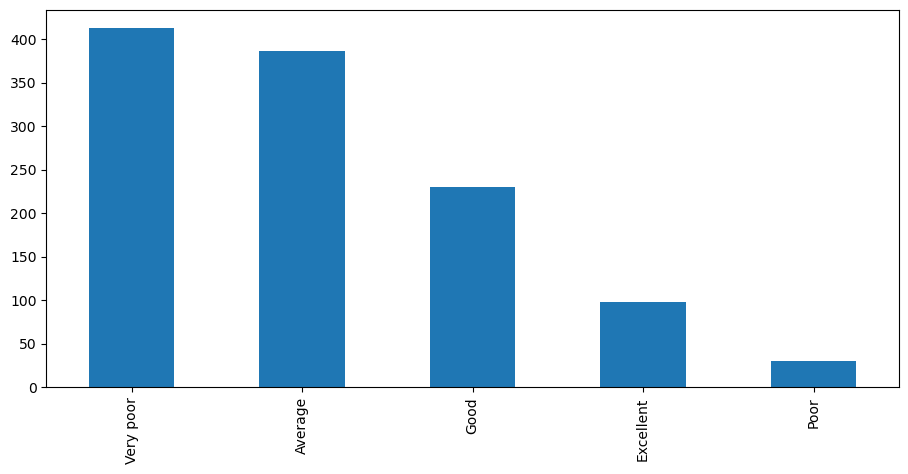

In [109]:
df['Rating of Online Class'].value_counts().plot(kind='bar')

***
**Mostly ratings on online class given by students was very poor, which means students don't like online classes** 
***

#### Checking preferred social media platform

In [147]:
df['social media platform'].value_counts()

Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
None           1
Quora          1
WhatsApp       1
Talklife       1
Elyment        1
Name: social media platform, dtype: int64

In [33]:
df['social media platform'] = df['social media platform'].str.strip().str.lower()

***
**As we can see the data is not proper as we can see whatsapp and None coming twice.So we processed it to make it useful**
***

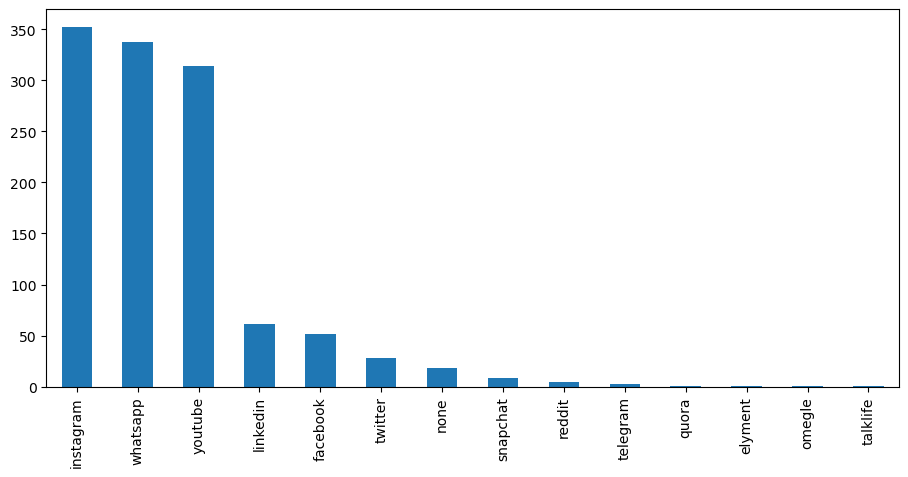

In [34]:
df["social media platform"].value_counts().plot(kind="bar")

***
**As we can see mostly people prefer instagram followed by whatsapp.**
***

#### Change in weight

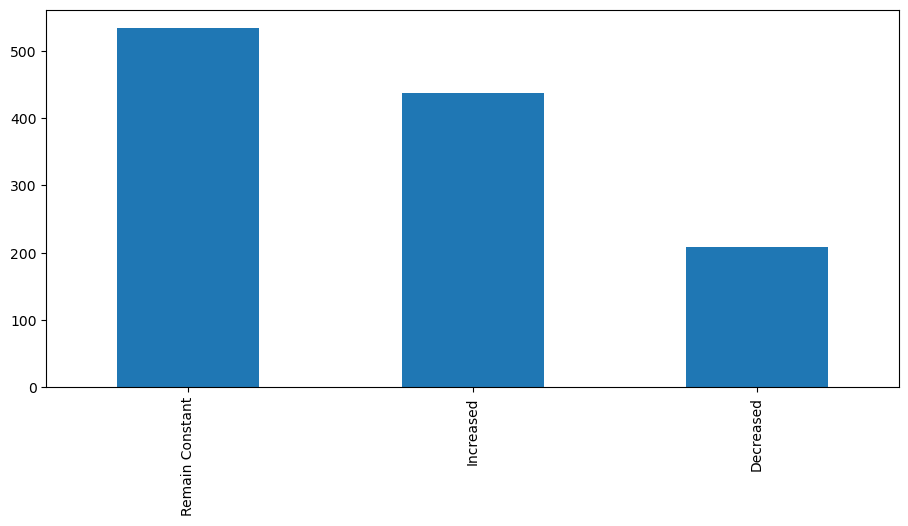

In [46]:
df["weight changed"].value_counts().plot(kind="bar")

***
**As we can see motly people's weight remain constant during lockdwon**
***

#### Checking your health issues

In [49]:
df["health issue"].value_counts()

NO     1021
YES     161
Name: health issue, dtype: int64

***
**As we can see mostly there were no health issue among people during lockdwon**
***

##### 1. How number of meals effecting health

In [53]:
df[df['health issue'] == "YES"]['meals per day'].value_counts()

3    76
2    52
4    23
1     9
5     1
Name: meals per day, dtype: int64

***
**Mostly people who used to have three meals per day had health issues.**
***

 ##### 2. Find total number of hours spend on screen

In [155]:
df['Total Time on screen'] = df['Online Class time'] + df['social media time'] +df["TV time"]

In [158]:
df['Total Time on screen'].value_counts()

6.00     144
7.00     138
5.00     138
8.00     135
4.00     102
9.00      73
3.00      60
10.00     60
11.00     39
2.00      37
6.50      27
5.50      19
7.50      17
2.50      14
13.00     14
14.00     13
4.50      12
3.50      12
1.00      12
12.00      9
10.50      8
9.50       8
1.50       7
8.50       7
16.00      5
15.00      5
9.30       5
0.00       4
4.30       4
4.75       3
11.50      3
2.75       3
19.00      3
5.10       2
5.30       2
6.10       2
0.50       2
0.45       1
6.40       1
4.90       1
5.80       1
0.60       1
2.30       1
0.40       1
4.10       1
2.80       1
4.25       1
5.40       1
1.75       1
7.10       1
2.05       1
6.30       1
3.25       1
7.75       1
17.50      1
15.50      1
31.00      1
8.80       1
Name: Total Time on screen, dtype: int64

In [ ]:
df["Total Time on screen"]

***
**From above we can see the number of counts of people on the basis of hours they spend on front of screen and mostly people spend 6 hours in front of screen**
***

#### 3. Most common stress busters

In [61]:
busters=[]
df['Stress busters'].apply(lambda x:busters.extend(map(lambda x:x.strip(),x.lower().split(','))) if type(x)==str else x)

pd.Series(busters).str.strip().str.split("and", expand=True).stack().str.strip().value_counts()

listening to music                                          280
online gaming                                               176
watching web series                                         102
reading books                                                81
scrolling through social media                               74
                                                           ... 
all reading books watching web series listening to music      1
singing                                                       1
playing                                                       1
talking with friends                                          1
i have no problem of stress                                   1
Length: 91, dtype: int64

In [62]:
words = " ".join(busters)

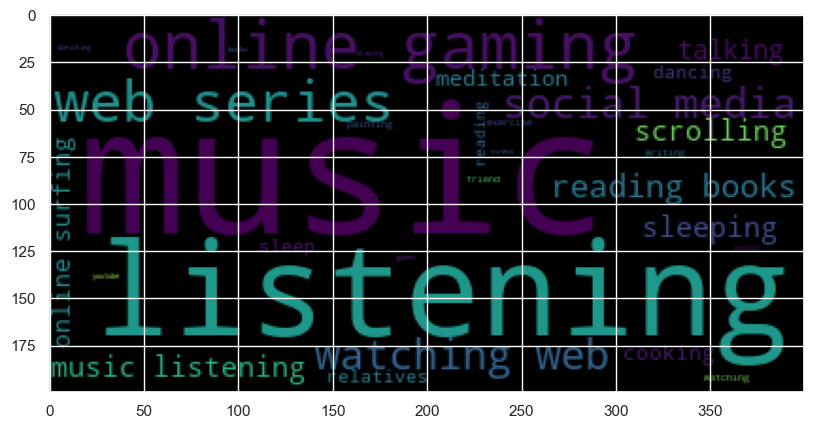

In [63]:
wordcloud = WordCloud().generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

***
**As per data we got to know was that mostly people used to listen music to relieve there stress**
***

#### 4. Number of person who are not find connected to their family and miss them

In [143]:
df['mostly missed'].str.split(",", expand=True).stack().str.lower().str.strip().str.contains("family").sum()

2

***
**As we can there were just 2 of them who were not connected to their family and missed them during the lockdown** 
***

##### 5. Most common stress buster of the people according to their age#### 

In [164]:
age_wise = df.groupby("age")['Stress busters'].apply(lambda x: x.str.split(",", expand=True).stack().str.split("and", expand=True).stack().str.strip().value_counts(sort=True, ascending=False))
age_wise.sort_index(ascending=False)[:80]

age                    
59   Sleep                 1
52   Reading               1
50   Listening to music    1
46   Cooking               1
45   Meditation            1
                          ..
27   Web Series            1
     Sleeping              1
     Online gaming         1
     Listening to music    2
     Cooking               1
Name: Stress busters, Length: 80, dtype: int64

##### 6. The social media platform the adults and minor prefer

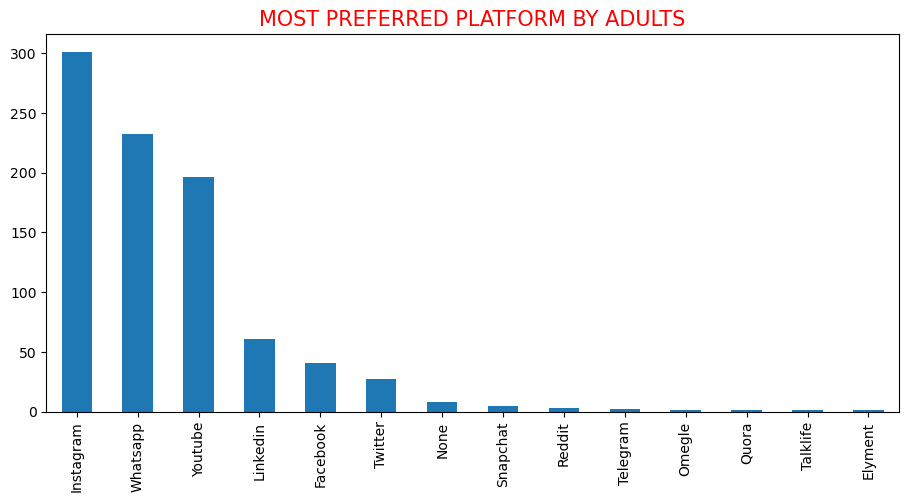

In [67]:
t = df[df['age']>=18]['social media platform'].value_counts().plot(kind='bar', title='MOST PREFERRED PLATFORM BY ADULTS')
t.title.set_color("red")
t.title.set_fontsize(15)

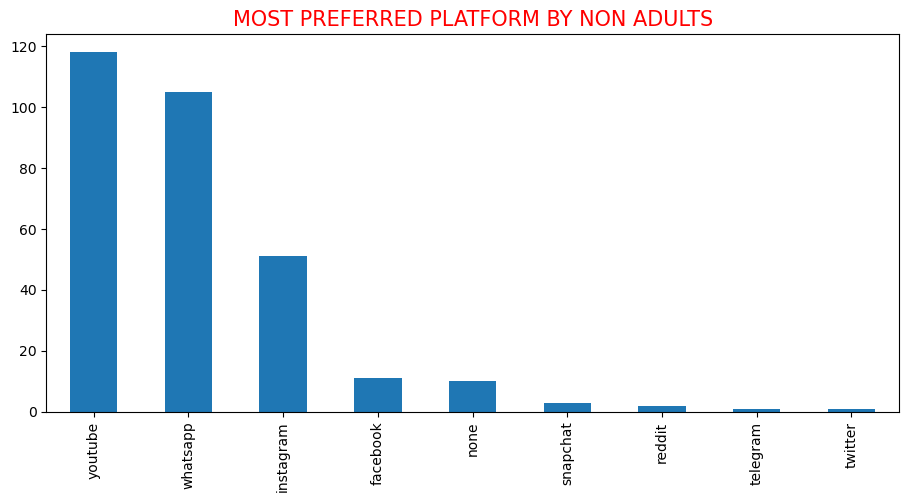

In [113]:
t = df[df['age']<18]['social media platform'].value_counts().plot(kind='bar', title='MOST PREFERRED PLATFORM BY NON ADULTS')
t.title.set_color("red")
t.title.set_fontsize(15)

***
**As we see instagram was preferd mostly by the adult whereas the minors preferred youtube**
***

#### 7. how many people have listening to music as their stress busters?

In [160]:
busters=[]
df['Stress busters'].apply(lambda x:busters.extend(map(lambda x:x.strip(),x.lower().split(','))) if type(x)==str else x)

pd.Series(busters).str.strip().str.split("and", expand=True).stack().str.strip().value_counts()[0]

280

***
**Around 280 people where there who used to listen music as a stress buster**
***

##### 8.Are students spending most of the time in their self study or in social median?

In [117]:
(df['self study time'] > df['social media time']).sum() 

609

In [118]:
df['self study time'].count() - (df['self study time'] > df['social media time']).sum()

573

***
**According to data,as we have analysed we cna see mostly time was spent on self study as compared to social media**
***

##### 9. how many spending less than 1 hr on fitness and facing health issues

In [119]:
df[(df['fitness time'] < 1) & (df['health issue'] == "YES")].__len__()

78

***
**There were around 78 people who had health issue and they don't even spent 1 hour on there fitness**
***

#### 10. The person who spend more time on screen sleep more or less

In [167]:
df[df["Total Time on screen"] >=  df["Total Time on screen"].median()]["sleep time"].value_counts()

8.0     233
7.0     160
6.0     104
9.0      82
10.0     58
5.0      33
12.0     24
11.0     17
13.0      5
4.0       3
7.8       1
8.3       1
8.5       1
6.5       1
Name: sleep time, dtype: int64

***
+ **From above we have analysed the effect of spending more time on screen on there sleep**
+ **Around 236 people who spend more time on screen slept for around8 hours**
***

**11. How they utilised their time**

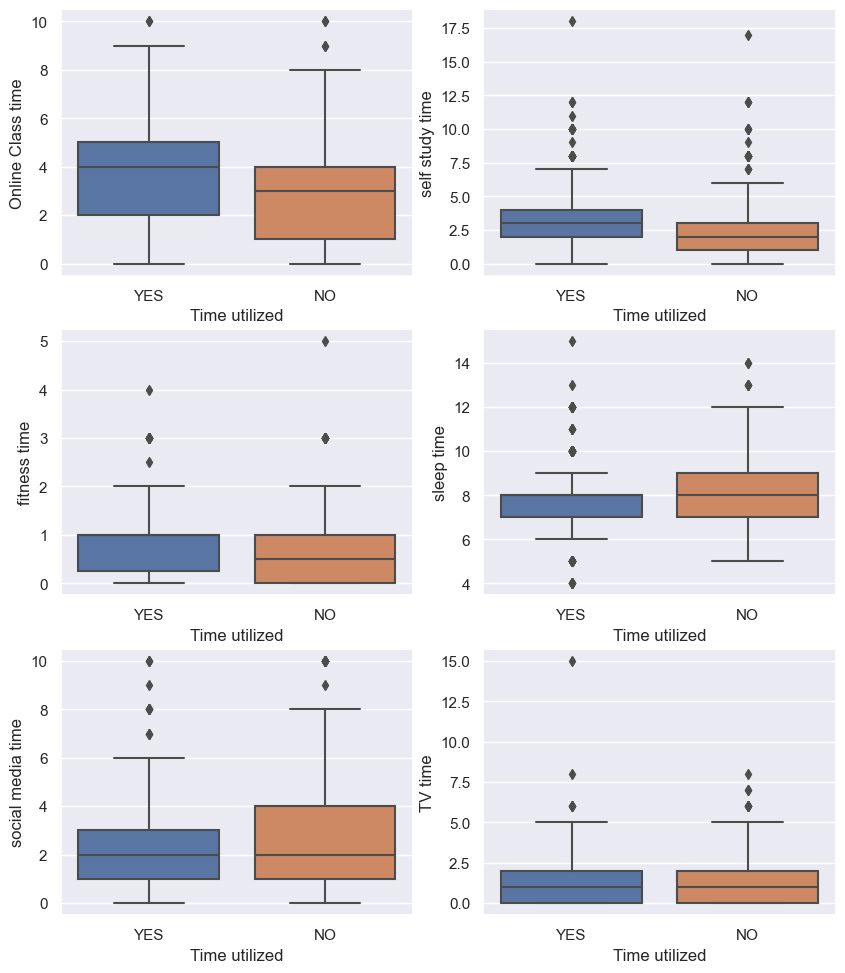

In [60]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(3,2, figsize=(10,12))
sns.boxplot(x='Time utilized', y='Online Class time', data=df, ax=ax[0,0])
sns.boxplot(x='Time utilized', y='self study time', data=df, ax=ax[0,1])
sns.boxplot(x='Time utilized', y='fitness time', data=df, ax=ax[1,0])
sns.boxplot(x='Time utilized', y='sleep time', data=df, ax=ax[1,1])
sns.boxplot(x='Time utilized', y='social media time', data=df, ax=ax[2,0])
sns.boxplot(x='Time utilized', y='TV time', data=df, ax=ax[2,1])
plt.show()

***
**SUMMARY**
***

+ **Above we have seen how people spend there time during lockdown,which activity they prefer which not.**
+ **We see above mostly people prefer listening music as the stress buster**
+ **Conducting classes was preferred worst as the rating given were very poor by the majorit**
+ **Instagram was preferred by the adults where as the minors preferred youtube**
+ **We checked the number of people who didn't even spent 1 hour on exercising**